## Section F. Multiclass Perceptron

In this section, you are asked to demonstrate your understanding of linear
models for classification. You expand the binary-class perceptron algorithm that
is covered in Activity 1 of Module 3 into a multiclass classifier.

### Question 8 [Multiclass Perceptron, 25 Marks]

1. Load Task2C_train.csv and Task2C_test.csv sets.

In [1]:
# Load the libraries for wrangling and plotting data
library(reshape2)
library(ggplot2)

Warning message:
"package 'reshape2' was built under R version 3.5.3"Warning message:
"package 'ggplot2' was built under R version 3.5.3"

In [2]:
# Load the train and the test set
train <- read.csv("Task2C_train.csv")
test <- read.csv("Task2C_test.csv")

# Get the train length and the test length
train.len <- nrow(train)
test.len <- nrow(test)

# Split the data into input values and corresponding labels
train.data <- train[, c(1,2,3,4)]
train.label <- train[, 5]

test.data <- test[, c(1,2,3,4)]
test.label <- test[, 5]

2. Implement the multiclass perceptron as explained above. Please provide enough comments for your code in your submission.

In [3]:
## Basis function for train data
Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 as phi_0

## Basis function for test data
Phi_test <- as.matrix(cbind(1, test.data)) # add a column of 1 as phi_0

Initialise the weight vectors randomly w1 ,.. ,wK

In [4]:
# Initialization

set.seed(123)

# class labels
c0 <- 1
c1 <- -1 

# Learning rate
eta <- 0.1 

# Stoping criterion
epsilon <- 0.001 

# Maximum number of iterations
tau.max <- 200

# iteration counter 
tau <- 1 

# termination status
terminate <- FALSE 

# Convention for class labels
T_train <- ifelse(train.label=='C1', 1,
          ifelse(train.label == 'C2', 2, 3)
       )

T_test <- ifelse(test.label=='C1', 1,
          ifelse(test.label == 'C2', 2, 3)
       )

# Empty Weight vector for classes C1, C2 and C3
W <- matrix(,nrow=3, ncol=ncol(Phi)) # Empty Weight vector

# Random initial values for weight vector
W[1,] <- runif(ncol(Phi)) # Random initial values for weight vector
W[2,] <- runif(ncol(Phi)) # Random initial values for weight vector
W[3,] <- runif(ncol(Phi)) # Random initial values for weight vector

# Matrix to store the batch and corresponding error 
error_matrix = data.frame(matrix(ncol = 2, nrow = 0))

**While not converged do:**

**For n in (1:N):**
<br>

y_predicted = max(W1.X, W2.X, W3.X)
<br>

If y_predicted != y_true:
<br>

 * Increment the weight corresponding to true value (y_true)
 * Whereas, decrement the weight corresponding to predicted value (y_predicted)
 
Else:
<br>

 * Don't change the weight parameters
 
 
**Note:** The same dataframe is used to store W1, W2 and W3.It stores the optimum values of W.
    

In [5]:
# Main Loop 
while(!terminate){
    
    # resuffling train data and associated labels:
    train.index <- sample(1:train.len, replace = FALSE)
    Phi <- Phi[train.index,]
    T_train <- T_train[train.index]
    
    # resuffling test data and associated labels:
    test.index <- sample(1:test.len, replace = FALSE)
    Phi_test <- Phi_test[test.index,]
    T_test <- T_test[test.index]
    
    
    for (i in 1:train.len){
        
        # Stopping condition
        if (tau == tau.max) {break}
        
        # Take the max of each weights
        arg_max <- c(Phi[1,]%*%W[1,],Phi[1,]%*%W[2,],Phi[1,]%*%W[3,])
        y_predicted <- which.max(arg_max)
        
        # Increment the counter
        tau <- tau +1
        
        # Predicted value is 1
        if (y_predicted == "1"){
            
            # If predicted value == true value ==1, don't update weights.
            if(T_train[i] == "1"){        

                W[1,] <- W[1,]
                W[2,] <- W[2,]
                W[3,] <- W[3,]    

            }
            
            # If predicted value == 1 and true value == 2, decrease weight of 1 and increase weight of 2
            else if(T_train[i] == "2"){

                W[1,] <- W[1,] - eta * (Phi[i,])
                W[2,] <- W[2,] + eta * (Phi[i,])
                W[3,] <- W[3,] 

            }
                # If predicted value == 1 and true value == 3, decrease weight of 1 and increase weight of 3
                else{

                W[1,] <- W[1,] - eta * (Phi[i,])
                W[2,] <- W[2,] 
                W[3,] <- W[3,] + eta * (Phi[i,])
            }

        }
        
        else if (y_predicted == "2"){
            
            # If predicted value == 2 and true value == 1, decrease weight of 2 and increase weight of 1
            if(T_train[i] == "1"){

                W[1,] <- W[1,] + eta * (Phi[i,])
                W[2,] <- W[2,] - eta * (Phi[i,])
                W[3,] <- W[3,] 

            }
            
            # If predicted value == 2 and true value == 2,  don't update weights.
            else if(T_train[i] == "2"){

                W[1,] <- W[1,]
                W[2,] <- W[2,]
                W[3,] <- W[3,]

            }
                # If predicted value == 2 and true value == 3, decrease weight of 2 and increase weight of 3
                else{

                W[1,] <- W[1,] 
                W[2,] <- W[2,] - eta * (Phi[i,])
                W[3,] <- W[3,] + eta * (Phi[i,])
            }

        }else{
            
            # If predicted value == 3 and true value == 1, decrease weight of 3 and increase weight of 1
            if(T_train[i] == "1"){

                W[1,] <- W[1,] + eta * (Phi[i,])
                W[2,] <- W[2,] 
                W[3,] <- W[3,] - eta * (Phi[i,])

            }
            
            # If predicted value == 3 and true value == 2, decrease weight of 3 and increase weight of 2
            else if(T_train[i] == "2"){
                W[1,] <- W[1,] 
                W[2,] <- W[2,] + eta * (Phi[i,])
                W[3,] <- W[3,] - eta * (Phi[i,])
            }
                # If predicted value == 3 and true value == 3,  don't update weights.
                else{
                W[1,] <- W[1,]
                W[2,] <- W[2,]
                W[3,] <- W[3,]
            }
        }
    
        # Evaluate error on the test set after processing every 5 batches
        if(i%%5 == 0){
            
            # Initialize error to 0
            error = 0
            
            # for each index in the test set
            for (j in 1:test.len){
                
                # Predict the y labels using optimum weights
                y_test <- c(Phi_test[j,]%*%W[1,],Phi_test[j,]%*%W[2,],Phi_test[j,]%*%W[3,])
                y_pred_test <- which.max(y_test)
                
                # Increment the error if incorrect prediction
                if(y_pred_test != T_test[j]){
                   error = error + 1 
                }
                
            }
            
            # Calculate the error after every 5 data points
            error_val <- error/test.len*100
            
            # Combine error with corresponding batch
            error_c <- c(tau%/%5,error_val)
            error_matrix <- rbind(error_matrix,error_c)
        }
        
              
               
    }
    
    
    # termination condition
    terminate <- tau >= tau.max 
}

In [6]:
# Check the error generated by each batch
col_names <- c("Batch", "Error")
names(error_matrix) <- col_names

# Just to verify
tail(error_matrix)

,Batch,Error
34,34,36.00000
35,35,50.66667
36,36,33.33333
37,37,33.33333
38,38,33.33333
39,39,25.33333


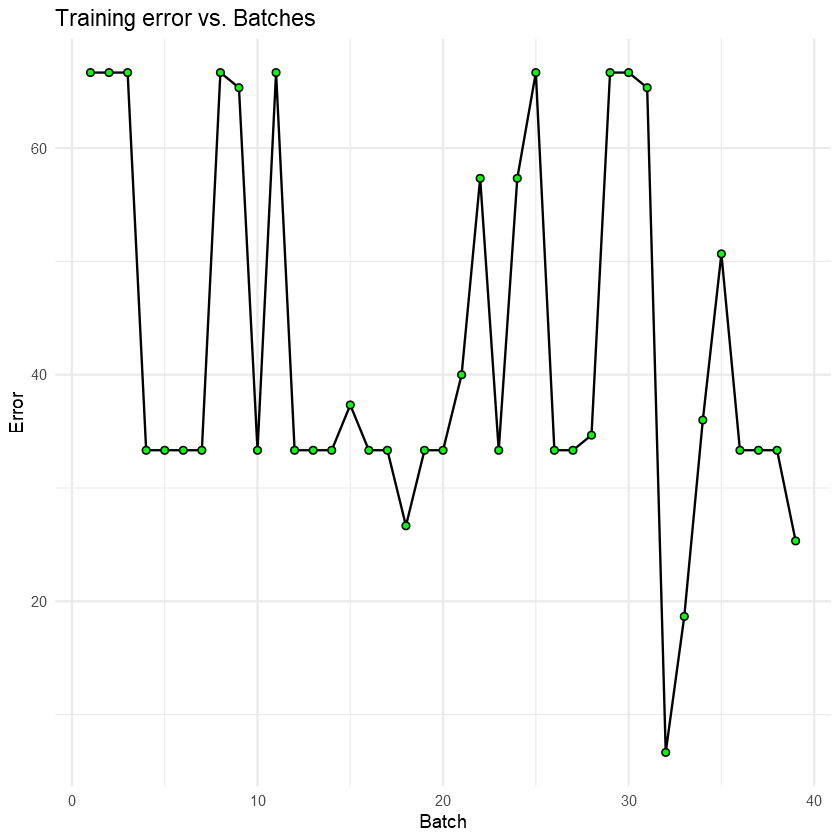

In [7]:
#Error of the test data vs no. of mini-batches
ggplot(data=error_matrix,aes(x=Batch, y=Error)) + geom_line() + geom_point(shape=21, fill='green')  +
    ggtitle('Training error vs. Batches') + theme_minimal()

4. Suppose we did not want to use multiclass Perceptron, and instead would be interested to use the one-versus-one approach to solve the multi-class classification problem (Chapter 2 in Module 3). The idea is to build K(K− 1)/2 classifiers for each possible pair of classes where K is the number of classes. Each point is then classified according to a majority vote among the discriminant functions.

a. Train your K(K-1)/2 perceptron binary classifiers using thetraining data.

In [8]:
# Just to verify the number of classifiers
labels = levels(train.label)
k = length(labels)
classifiers = k*(k-1)/2
cat("Number of classifiers:",classifiers)

Number of classifiers: 3

In [9]:
# Datasets for each class C1, C2 and C3
train_C1C2 = train[train['y'] != "C3",]
train_C1C3 = train[train['y'] != "C2",]
train_C2C3 = train[train['y'] != "C1",]

# Class C1
train.len_C1C2 <- nrow(train_C1C2)
train.data_C1C2 <- train_C1C2[, c(1,2,3,4)]
train.label_C1C2 <- train_C1C2[, 5]

# Class C2
train.len_C1C3 <- nrow(train_C1C3)
train.data_C1C3 <- train_C1C3[, c(1,2,3,4)]
train.label_C1C3 <- train_C1C3[, 5]

# Class C3
train.len_C2C3 <- nrow(train_C2C3)
train.data_C2C3 <- train_C2C3[, c(1,2,3,4)]
train.label_C2C3 <- train_C2C3[, 5]

**Classifier for C1 and C2**

In [10]:
## Basis function for class C1 and C2
Phi_C1C2 <- as.matrix(cbind(1, train.data_C1C2)) # add a column of 1 as phi_0

# Maximum iterations
tau.max <- 2

# Convention for class labels for C1 and C2
T_C1C2 <- ifelse(train.label_C1C2 == "C1", eval(parse(text=c0)), eval(parse(text=c1))) 

# Empty Weight vector for C1 and C2
W_C1C2 <- matrix(,nrow=tau.max, ncol=ncol(Phi_C1C2)) 

# Random initial values for weight vector
W_C1C2[1,] <- runif(ncol(Phi_C1C2)) 

tau <- 1 # iteration counter 
terminate <- FALSE # termination status

# Learning rate
eta <- 0.1 

In [11]:
# Main Loop (Step 2):
while(!terminate){
    # resuffling train data and associated labels:
    train.index <- sample(1:train.len_C1C2, replace = FALSE)
    Phi <- Phi_C1C2[train.index,]
    T <- T_C1C2[train.index]

    for (i in 1:train.len_C1C2){
        if (tau == tau.max) {break}
              
        # look for missclassified samples
        if ((W_C1C2[tau,]%*%Phi[i,])*T[i]<0){
            
            # update tau counter
            tau <- tau +1
            
            # update the weights
            W_C1C2[tau,] <- W_C1C2[tau-1,] + eta * Phi[i,] * T[i]
            
            # update the records
            #error.trace_C1C2[tau] <- sum((Phi%*%W[tau,])*T<0)/train.len*100
        } 
        
    }
    
    # decrease eta:
    eta = eta * 0.99
    # recalculate termination conditions
    terminate <- tau >= tau.max | 
        abs(sum((Phi%*%W_C1C2[tau,])*T<0)/train.len_C1C2 - sum((Phi%*%W_C1C2[tau-1,])*T<0)/train.len_C1C2) <= epsilon 
    
}

W_C1C2 <- W_C1C2[1:tau,] # cut the empty part of the matrix (when the loop stops before tau == tau.max)

In [12]:
# get the optimum weight parameters
w_C1C2 <- W_C1C2[tau,]
w_C1C2

[1]  0.1707780 -0.3199031  0.4512078 -0.0971476  0.7003981

**Classifier for C1 and C3**

In [13]:
## Basis function for class C1 and C3
Phi_C1C3 <- as.matrix(cbind(1, train.data_C1C3)) # add a column of 1 as phi_0

# Maximum number of iterations
tau.max <- 2

# Convention for class labels for C1 and C3
T_C1C3 <- ifelse(train.label_C1C3 == "C1", eval(parse(text=c0)), eval(parse(text=c1))) 

# Empty Weight vector for C1 and C3
W_C1C3 <- matrix(,nrow=tau.max, ncol=ncol(Phi_C1C3))

# Random initial values for weight vector
W_C1C3[1,] <- runif(ncol(Phi_C1C3)) 

tau <- 1 # iteration counter 
terminate <- FALSE # termination status

# Learning rate
eta <- 0.1 

In [14]:
# Main Loop (Step 2):
while(!terminate){
    # resuffling train data and associated labels:
    train.index <- sample(1:train.len_C1C3, replace = FALSE)
    Phi <- Phi_C1C3[train.index,]
    T <- T_C1C3[train.index]

    for (i in 1:train.len_C1C3){
        if (tau == tau.max) {break}
              
        # look for missclassified samples
        if ((W_C1C3[tau,]%*%Phi[i,])*T[i]<0){
            
            # update tau counter
            tau <- tau +1
            
            # update the weights
            W_C1C3[tau,] <- W_C1C3[tau-1,] + eta * Phi[i,] * T[i]
        } 
        
    }
    
    # decrease eta:
    eta = eta * 0.99
    # recalculate termination conditions
    terminate <- tau >= tau.max | 
        abs(sum((Phi%*%W_C1C3[tau,])*T<0)/train.len_C1C3 - sum((Phi%*%W_C1C3[tau-1,])*T<0)/train.len_C1C3) <= epsilon 
    
}

W_C1C3 <- W_C1C3[1:tau,] # cut the empty part of the matrix (when the loop stops before tau == tau.max)

In [15]:
# get the optimum weight parameters
w_C1C3 <- W_C1C3[tau,]
w_C1C3

[1]  0.20114252 -0.28532897  0.01211279 -0.51263004  0.33880492

**Classifier for C2 and C3**

In [16]:
## Basis function for class C2 and C2
Phi_C2C3 <- as.matrix(cbind(1, train.data_C2C3)) # add a column of 1 as phi_0

# Maximum number of iterations
tau.max <- 2

# Convention for class labels for C2 and C3
T_C2C3 <- ifelse(train.label_C2C3 == "C2", eval(parse(text=c0)), eval(parse(text=c1))) 

# Empty Weight vector for C2 and C3
W_C2C3 <- matrix(,nrow=tau.max, ncol=ncol(Phi_C2C3)) 
W_C2C3[1,] <- runif(ncol(Phi_C2C3)) # Random initial values for weight vector

tau <- 1 # iteration counter 
terminate <- FALSE # termination status

# Learning rate
eta <- 0.1 

In [17]:
# Main Loop (Step 2):
while(!terminate){
    # resuffling train data and associated labels:
    train.index <- sample(1:train.len_C2C3, replace = FALSE)
    Phi <- Phi_C2C3[train.index,]
    T <- T_C2C3[train.index]

    for (i in 1:train.len_C2C3){
        if (tau == tau.max) {break}
              
        # look for missclassified samples
        if ((W_C2C3[tau,]%*%Phi[i,])*T[i]<0){
            
            # update tau counter
            tau <- tau +1
            
            # update the weights
            W_C2C3[tau,] <- W_C2C3[tau-1,] + eta * Phi[i,] * T[i]
        } 
        
    }
    
    # decrease eta:
    eta = eta * 0.99
    # recalculate termination conditions
    terminate <- tau >= tau.max | 
        abs(sum((Phi%*%W_C2C3[tau,])*T<0)/train.len_C2C3 - sum((Phi%*%W_C2C3[tau-1,])*T<0)/train.len_C2C3) <= epsilon 
    
}

# cut the empty part of the matrix (when the loop stops before tau == tau.max)
W_C2C3 <- W_C2C3[1:tau,] 

In [18]:
# get the optimum weight parameters
w_C2C3 <- W_C2C3[tau,]

b. Predict the labels of the data points in the test set. Whenever there is a tie between two or more labels for a data point, call it a confusion event.

In [19]:
# Labels to store predicions of each classifies
y_C1C2_label <- c()
y_C1C3_label <- c()
y_C2C3_label <- c()

# Set testlabels of C1 as +1 and C2, C3 as -1
T_Test_C1C2 <- ifelse(test.label == "C1", eval(parse(text=c0)), eval(parse(text=c1)))

# Set testlabels of C1 as +1 and C2, C3 as -1 resp
T_Test_C1C3 <- ifelse(test.label == "C2", eval(parse(text=c0)), eval(parse(text=c1)))

# Set testlabels of C2 as +1 and C1, C3 as -1 resp
T_Test_C2C3 <- ifelse(test.label == "C3", eval(parse(text=c0)), eval(parse(text=c1)))

# for each index in the test set
for (j in 1:test.len){

    # Predict the y labels using optimum weights of W_C1C2
    y_C1C2 <- (Phi_test[j,]%*%w_C1C2) * T_Test_C1C2[j]  
    
    if (y_C1C2 > 0){
        y_C1C2_label <- c(y_C1C2_label, "C1")
    }
    else{
        y_C1C2_label <- c(y_C1C2_label, "C2")
    }
    
    # Predict the y labels using optimum weights of W_C1C3
    y_C1C3 <- (Phi_test[j,]%*%w_C1C3) * T_Test_C1C3[j]  
    
    if (y_C1C3 > 0){
        y_C1C3_label <- c(y_C1C3_label, "C1")
    }
    else{
        y_C1C3_label <- c(y_C1C3_label, "C3")
    }
    
    # Predict the y labels using optimum weights of W_C2C3
    y_C2C3 <- (Phi_test[j,]%*%w_C2C3) * T_Test_C2C3[j]  
    
    if (y_C2C3 > 0){
        y_C2C3_label <- c(y_C2C3_label, "C2")
    }
    else{
        y_C2C3_label <- c(y_C2C3_label, "C3")
    }
    
}

In [20]:
# dataframe to store the predictions of each class
out <- data.frame('Index'= 1:test.len,'W_C1C2'=y_C1C2_label, 'W_C1C3' = y_C1C3_label, 'W_C2C3' = y_C2C3_label)
head(out)

Index,W_C1C2,W_C1C3,W_C2C3
1,C2,C1,C2
2,C1,C1,C2
3,C1,C1,C2
4,C1,C1,C2
5,C2,C1,C2
6,C2,C1,C2


For each row in the *out* dataframe, if any two labels are same, store the predicted output as the label

In [21]:
# For every predicted output, check whether any 2 predictions are the same
for (i in 1:length(y_C1C2_label)){
    
    # Set the predicted label as label of any two columns having the same value
    
    if (y_C1C2_label[i] == y_C1C3_label[i]) {out[i,"Predicted Label"] = y_C1C2_label[i]}
        
    else if (y_C1C3_label[i] == y_C2C3_label[i]) {out[i,"Predicted Label"] = y_C1C3_label[i]}
        
    else if (y_C1C2_label[i] == y_C2C3_label[i]) {out[i,"Predicted Label"] = y_C1C2_label[i]}
    
    # If none of the elements are same, set the predicted output as confusion
    else {out[i,"Predicted Label"] = "Confusion"}
}

In [32]:
# Check the result
head(out[out["Predicted Label"] == "Confusion",])

,Index,W_C1C2,W_C1C3,W_C2C3,Predicted Label
26,26,C1,C3,C2,Confusion
29,29,C1,C3,C2,Confusion
34,34,C1,C3,C2,Confusion
36,36,C1,C3,C2,Confusion
40,40,C1,C3,C2,Confusion
41,41,C1,C3,C2,Confusion


In [33]:
# Number of outputs whose label is "Confusion"
dim(out[out["Predicted Label"] == "Confusion",])

[1] 24  5

c. Did you expect to see a confusion event in the one-versus-one approach ? For how many test data points you have observed
confusion? Why? Explain in your Jupyter Notebook file.

**Answer:** 
* Yes, the confusion events while implementing a one-to-one multi-class perceptron was expected since this classifier creates a ambigious region in which the data point may belong to any class. 
* The drawback of this classifier is that it fails to classify such data points lying in the ambigious regions. The output matrix printed above shows the predictions labelled as *Confusion*. 
* There are total 24 rows whose predicted label is ambigious.
* They are labelled as *Confusion* since they are classified to all the three classes C1, C2 and C3.